<a href="https://colab.research.google.com/github/linxunshan/CS448_Assignment_2/blob/main/CS448_Assigment2.ipynb#scrollTo=_rQ_5OGxw-zY" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS448 Assignment 2

Hello everyone! This is one of my jupyter notebook from CS301.

## Abstract

This jupyter notebook is calculating the Taylor polynomials centered at 0, for cos x for the following 4 values of x![w1.png](attachment:w1.png) which is equivalent to j/10, for j=1,2,3,4.


Then For each value of j, find the smallest integer such that
![w2.png](attachment:w2.png)

Also, there is a data anlysis for the error in the end of notebook. If you are interested in it, you can have a look!

### Setup and Imports

In order to run this notebook live you will need to make sure the following modules are installed on your machine:  
    1.math  
    2.numpy  
    3.pandas  
    4.sympy  
   
You can see the import section below:

In [1]:
import math
import numpy as np
import pandas as pd

### function for calculating taylor sum

This is the function for calculating taylor sum, so in order to get Tn(x), we use this function.

In [2]:
def taylor_cos(x,n):

    cos_sum = 0
    for n in range(0, n+1):
        cos_sum += (math.pow(-1, n)/math.factorial(2*n)) * math.pow(x,(2*n))
    return cos_sum

### function for getting the value of smallest n

This code is actually getting ![w2.png](attachment:w2.png)

Use the combination of function for calculating taylor sum and this function, we will find out, the smallest term of n, when error is less than 10^-12

In [70]:

def taylor_small_n():
    for j in range(1,5):
        n=0
        True_Value = np.cos(j/10)
        while True:
            Estimated_Sum = taylor_cos(j/10, n)
            abs_Err = abs(Estimated_Sum - True_Value)
            if (abs_Err < math.pow(10,-12)):
                print("j={} | n={} | Approximated Sum = {} | Actual Sum= {} | Error = {}".format(j, n, Estimated_Sum, True_Value, abs_Err))
                print ("")
                print('--------------------------------------------------------------------------------------------------------------------')
                break
            n+=1

taylor_small_n()




j=1 | n=3 | Approximated Sum = 0.9950041652777778 | Actual Sum= 0.9950041652780258 | Error = 2.4802382370125997e-13

--------------------------------------------------------------------------------------------------------------------
j=2 | n=4 | Approximated Sum = 0.9800665778412698 | Actual Sum= 0.9800665778412416 | Error = 2.8199664825478976e-14

--------------------------------------------------------------------------------------------------------------------
j=3 | n=5 | Approximated Sum = 0.9553364891256049 | Actual Sum= 0.955336489125606 | Error = 1.1102230246251565e-15

--------------------------------------------------------------------------------------------------------------------
j=4 | n=5 | Approximated Sum = 0.92106099400285 | Actual Sum= 0.9210609940028851 | Error = 3.5083047578154947e-14

--------------------------------------------------------------------------------------------------------------------


### error bound calculation

After getting smallest n above, we should find out error bound for cos x in this section

In [4]:
from sympy import diff, cos,evalf
from sympy.abc import x

array =[(1,3),(2,4),(3,5),(4,5)]
for j,n in array:
    print('j=',j,'n=',n)
    M=diff(cos(x), x, n+1 )
    m = M.evalf(subs={x:j/10})
    error_bound = abs((m/math.factorial(n+1)) * math.pow(0.1,(n+1)))
    print('error_bound=',error_bound)


j= 1 n= 3
error_bound= 4.14585068865844e-6
j= 2 n= 4
error_bound= 1.65557775662551e-8
j= 3 n= 5
error_bound= 1.32685623489668e-9
j= 4 n= 5
error_bound= 1.27925138055956e-9


### Using pandas to make a clear table, so can compare data clearly.

Pandas is very useful in making tables, I will recommand it!

In [68]:
import pandas as pd
table = [
    ['1/10','3' ,'0.9950041652777778', '0.9950041652780258', '2.4802382370125997e-13','4.14585068865844e-6' ],
    ['2/10','4' ,'0.9800665778412698', '0.9800665778412416', '2.8199664825478976e-14', '1.65557775662551e-8' ],
    ['3/10','5' ,'0.9553364891256049', '0.955336489125606', '1.1102230246251565e-15','1.32685623489668e-9' ],
    ['4/10','5' ,'0.92106099400285', '0.9210609940028851', '3.5083047578154947e-14','1.27925138055956e-9'  ]]
pd.set_option('display.float_format', str)
df = pd.DataFrame(table, columns=['value of x','smallest n', 'Taylor sum T(x)', 'Actual value of cos(x)', 'Absolute Error', 'Error Bound'])
df.style.hide_index()

value of x,smallest n,Taylor sum T(x),Actual value of cos(x),Absolute Error,Error Bound
1/10,3,0.9950041652777778,0.9950041652780258,2.4802382370125997e-13,4.14585068865844e-6
2/10,4,0.9800665778412698,0.9800665778412416,2.8199664825478976e-14,1.65557775662551e-8
3/10,5,0.9553364891256049,0.955336489125606,1.1102230246251565e-15,1.32685623489668e-9
4/10,5,0.92106099400285,0.9210609940028851,3.5083047578154947e-14,1.27925138055956e-9


### Analysis and discussion about the data

This assignment we should calculate the Taylor polynomials centered at 0 for f = cos(x). 
For each x = { 1/10, 2/10, 3/10, 4/10 }, the values of n I got from my function were {3, 4, 5, 5}.
So, it means for x= 1/10, we should calculate the sum of first 3 terms for the cos taylor polynomials in order to get
the absolute error is less than 10^-12. And the sum of first 4 terms for x = 2/10, the sum of first 5 terms for x = 3/10,
and lastly, the sum of first 5 terms for x = 4/10.

That's look deeper into data I calculated for Taylor sum and actual value of cos(x). For x= 1/10, we can see the difference 
appeared after 11 digits, it's close to 10^-12, however, it might be more accurate. For x=2/10, we noticed the difference 
appeared after 13 digits. Then x=3/10, it's after 14 digits, and x=4/10, it's also after 14 digits. so, once we do
subtraction between taylor sum and actual value, it turns out the absolute error which is also the remainder term is less than
10^-12! It fits to the absolute error!

The last but not least, I also calculate the error bound for each x=j/10 with my code. I use the formula from class 
presentation. Compare to the absolute error, error bound is much more greater than the absolute error. For x=1/10, 
error bound is 4.14585068865844e-6, but absolute is only 2.4802382370125997e-13. For x=2/10, error bound is 
1.65557775662551e-8, it's getting smaller, however, absolute error is only 2.8199664825478976e-14. For x=3/10, and x=4/10, 
error bound is sitll greater than the absolute error(remainder term Rn(x)). In conclusion, compare to the error bounds for 
Taylor polynomials that we discussed in class, the formula Rn(x) <= error bound, it exactly fits with my data. The errors 
match up the expressions in the class presentation slides.


# Interesting AI memes

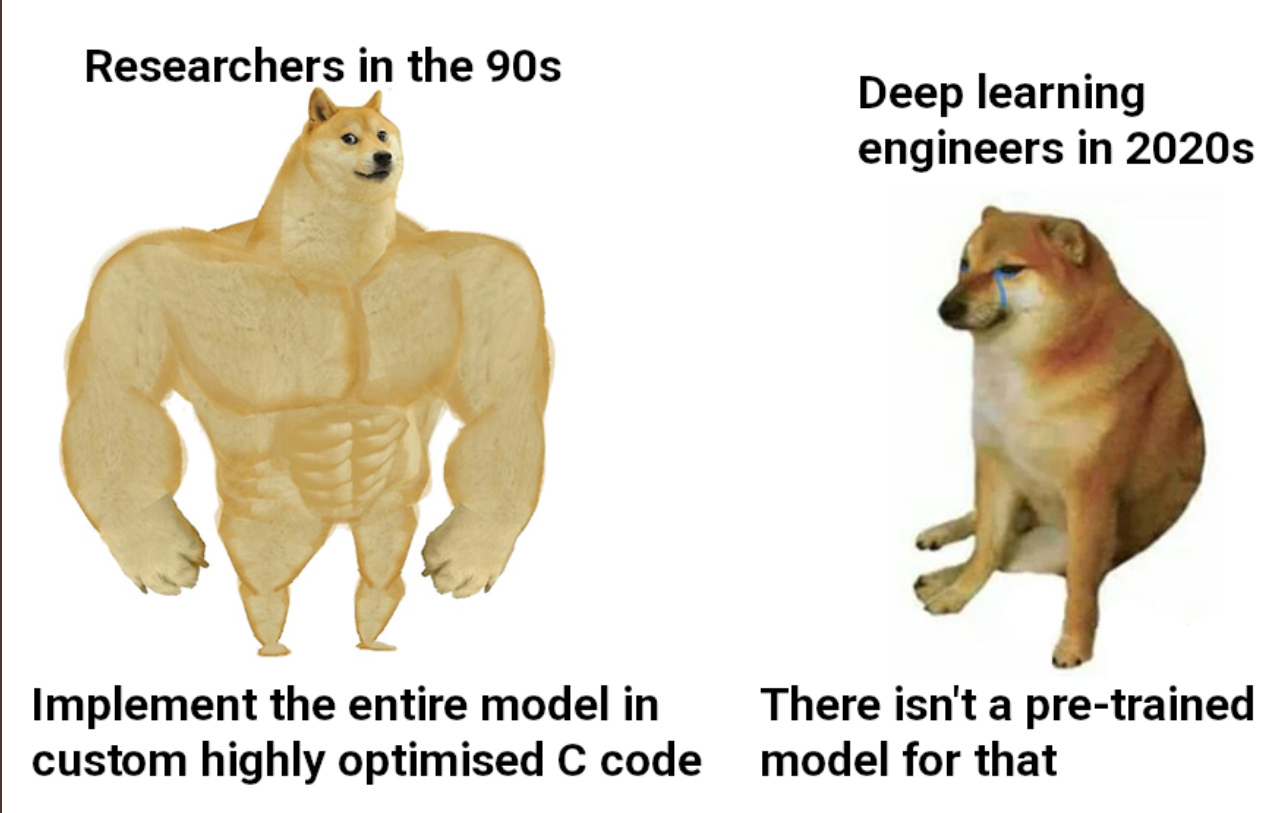

![aimeme2.png](attachment:aimeme2.png)

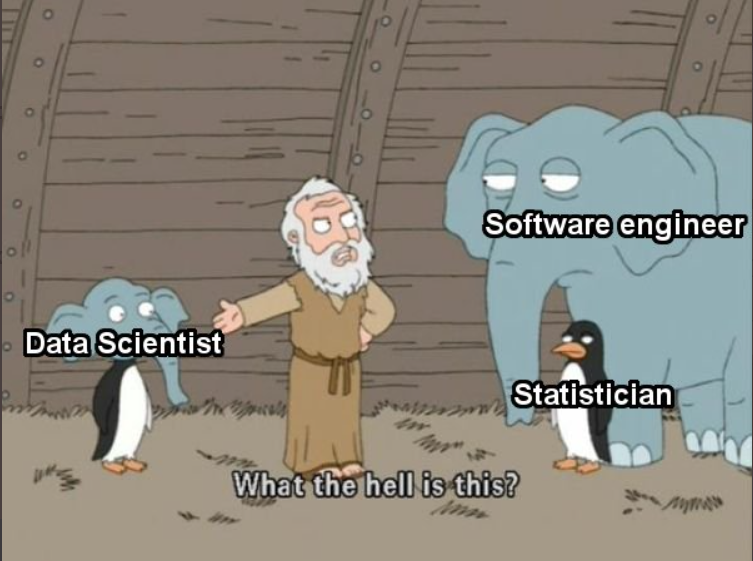